In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge,Lasso

In [2]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
print(boston_df.info)

<bound method DataFrame.info of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0

In [4]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
boston_df["Price"]=boston.target
#dependent variable
boston_df["Price"].head()
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#independent variables are those dropping the dependent variable Price
X=boston_df.drop("Price",axis=1)


In [7]:
Y=boston_df["Price"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(len(x_train),len(x_test))

354 152


In [9]:
regr=LinearRegression()
#Data Fitting
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print("regression coefficients:", regr.coef_)
print("a0=",regr.intercept_)

regression coefficients: [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
a0= 37.937107741833316


In [12]:
y_pred=regr.predict(x_test)


In [13]:
#Compute RMSE and R2 Measure

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

5.21497514537542


In [16]:
r2=r2_score(y_test,y_pred)
print("regression score =",r2)


regression score = 0.6733825506400175


In [17]:
y_pred.shape
x_test.shape

(152, 13)

Text(0.5, 1.0, 'Residual Plot')

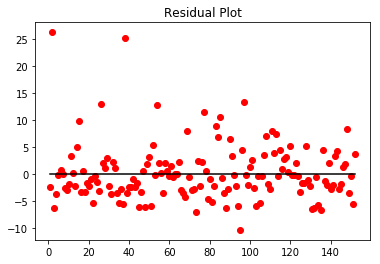

In [18]:
residue=y_test-y_pred
x=[i for i in range(1,len(y_pred)+1)]
plt.scatter(x,residue,color="red")
plt.plot(x,[0]*len(y_pred),color="Black")
plt.title("Residual Plot")

## Regularization

In [19]:
#value-min/max-min -----> normalisation
#min-max normalisation always ranges from 0 to 1.

In [20]:
predictors=x_train.columns
predictors

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [23]:
coef=pd.Series(regr.coef_,predictors).sort_values()
coef

NOX       -16.231253
DIS        -1.500270
PTRATIO    -1.017753
LSTAT      -0.486738
CRIM       -0.121310
TAX        -0.011072
AGE        -0.009985
B           0.006814
INDUS       0.011342
ZN          0.044466
RAD         0.242143
CHAS        2.511246
RM          3.859068
dtype: float64

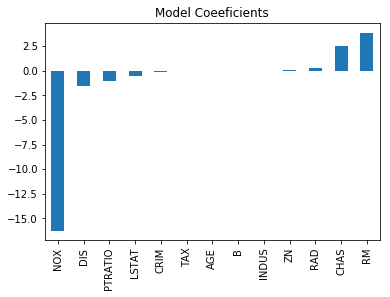

In [25]:
coef.plot(kind="bar",title="Model Coeeficients")

## Ridge Regression
- L2 regularization


In [26]:
from sklearn.linear_model import Ridge
#Alpha is the hyperparameter of ridge , which means that they are not automatically learnt by the
#model, instead they have to be set manually.


In [27]:
ridgereg=Ridge(alpha=0.05,normalize=True)
ridgereg.fit(x_train,y_train)
pred=ridgereg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print("RMSE=",rmse,"R2=",r2)

RMSE= 5.294568990922837 R2= 0.6633364329053606


In [31]:
df=pd.DataFrame(columns=["Linear Reg","Ridge Reg"])
for i in range(len(ridgereg.coef_)):
    df=df.append({'Linear Reg':regr.coef_[i],"Ridge Reg":ridgereg.coef_[i]},ignore_index=True)
df

,Linear Reg,Ridge Reg
0,-0.121310,-0.107003
1,0.044466,0.034983
2,0.011342,-0.031176
3,2.511246,2.706283
4,-16.231253,-11.944549
5,3.859068,4.005463
6,-0.009985,-0.011797
7,-1.500270,-1.228896
8,0.242143,0.137535
9,-0.011072,-0.006469


#### Lasso Regression

In [37]:
lassoreg=Lasso(alpha=0.025,normalize=True)
lassoreg.fit(x_train,y_train)
pred=lassoreg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print("RMSE=",rmse,"R2=",r2)

RMSE= 5.614756579595033 R2= 0.6213859182328194


In [38]:
df=pd.DataFrame(columns=["Linear Reg","Ridge Reg","Lasso Reg"])
for i in range(len(ridgereg.coef_)):
    df=df.append({'Linear Reg':regr.coef_[i],"Ridge Reg":ridgereg.coef_[i],"Lasso Reg":lassoreg.coef_[i]},ignore_index=True)
df

,Linear Reg,Ridge Reg,Lasso Reg
0,-0.121310,-0.107003,-0.038053
1,0.044466,0.034983,0.000000
2,0.011342,-0.031176,-0.000000
3,2.511246,2.706283,1.449801
4,-16.231253,-11.944549,-0.771800
5,3.859068,4.005463,4.223300
6,-0.009985,-0.011797,-0.000000
7,-1.500270,-1.228896,-0.109045
8,0.242143,0.137535,-0.000000
9,-0.011072,-0.006469,-0.001265


In [43]:
alpha=[0.01,0.1,0.5,0.001,0.5,1,5,10]
r2_ridge=[]
for i in alpha:
    ridgereg=Ridge(alpha=i,normalize=True)
    ridgereg.fit(x_train,y_train)
    pred=ridgereg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    r2=r2_score(y_test,pred)
    #print("RMSE=",rmse,"R2=",r2)
    r2_ridge.append(r2)

RMSE= 5.232109721061351 R2= 0.6712327243277343
RMSE= 5.359205302329307 R2= 0.6550662530677254
RMSE= 5.701437531133865 R2= 0.6096055475638087
RMSE= 5.216694030174464 R2= 0.6731672053022686
RMSE= 5.701437531133865 R2= 0.6096055475638087
RMSE= 6.0053523213673135 R2= 0.566876367866915
RMSE= 7.166048194051284 R2= 0.3832710341605008
RMSE= 7.752494152989228 R2= 0.2781984807037896


In [44]:
alpha=[0.01,0.1,0.5,0.001,0.5,1,5,10]
r2_lasso=[]
for i in alpha:
    lassoreg=Lasso(alpha=i,normalize=True)
    lassoreg.fit(x_train,y_train)
    pred=ridgereg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    r2=r2_score(y_test,pred)
    #print("RMSE=",rmse,"R2=",r2)
    r2_lasso.append(r2)

In [50]:
df=pd.DataFrame(columns=["Ridge Reg","Lasso Reg"])
for i in range(len(r2_lasso)):
    df=df.append({"alpha":alpha[i],"Ridge Reg":r2_ridge[i],"Lasso Reg":r2_lasso[i]},ignore_index=True)
df

,Ridge Reg,Lasso Reg,alpha
0,0.671233,0.278198,0.010
1,0.655066,0.278198,0.100
2,0.609606,0.278198,0.500
3,0.673167,0.278198,0.001
4,0.609606,0.278198,0.500
5,0.566876,0.278198,1.000
6,0.383271,0.278198,5.000
7,0.278198,0.278198,10.000
